# **Import Needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
df = pd.read_csv("/content/Super_Store_Data_After_EDA (1).csv", encoding='latin1')

**Spliting the Data**

In [ ]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Sales'].median()
df['Hights_Sales'] = (df['Sales'] >= median_sales).astype(int)

In [ ]:
print(df['Hights_Sales'].value_counts())    #Assumption one (Appropriate Outcome Type)

Hights_Sales
1    2055
0      65
Name: count, dtype: int64


In [ ]:
x = df.drop(['Sales','Hights_Sales'], axis=1)
y = df['Hights_Sales']

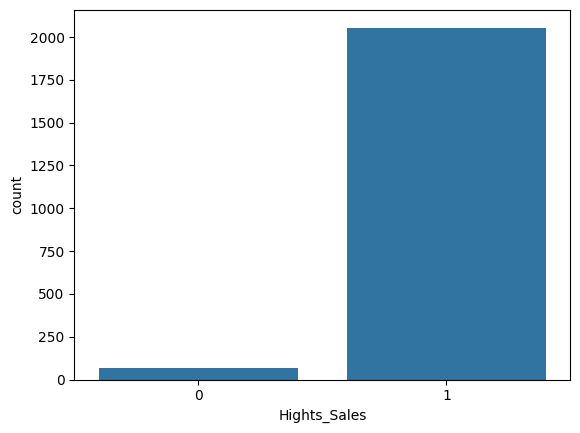

In [ ]:
sns.countplot(x='Hights_Sales', data=df)
plt.show()

In [ ]:
resambel = RandomOverSampler(random_state=42)
X_resampled, y_resampled = resambel.fit_resample(x, y)
print(y_resampled.value_counts())

Hights_Sales
1    2055
0    2055
Name: count, dtype: int64


In [ ]:
balanced_df = pd.DataFrame(X_resampled, columns=x.columns)
balanced_df['Hights_Sales'] = y_resampled

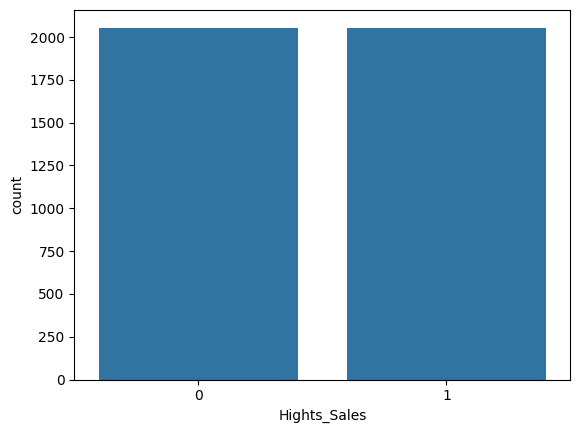

In [ ]:
sns.countplot(x='Hights_Sales', data=balanced_df)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Trian the data**

In [ ]:
#Standarized the numerical col
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [ ]:
pip install alibi


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5d823cd9a2aac6468ddc98741d1be7efc40794412841747bba66e8697f2e4c59
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


#**4- KNN Model Training**

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)

In [ ]:
# KNN Model Implementation
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, knn_preds):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_preds)}")


KNN Model Evaluation:
Accuracy: 0.9380
Confusion Matrix:
[[385   0]
 [ 51 386]]


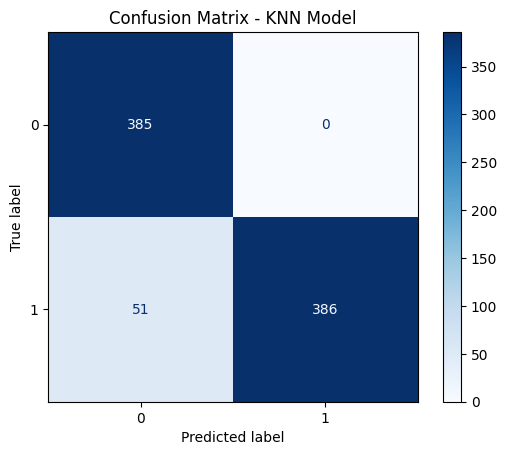

In [ ]:
cm_knn = confusion_matrix(y_test, knn_preds)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_)
disp_knn.plot(cmap='Blues')

plt.title("Confusion Matrix - KNN Model")
plt.show()

#**Explainability Techniques:-**

#**1- PDP Plots For KNN**

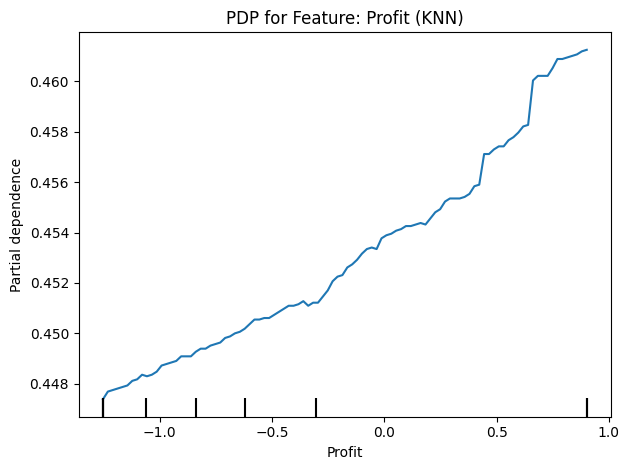

In [ ]:
feature_idx = [12]

# PDP for KNN model
PartialDependenceDisplay.from_estimator(
    knn_model, X_train, features=feature_idx, feature_names=X_train.columns
)
plt.title("PDP for Feature: {} (KNN)".format(X_train.columns[feature_idx[0]]))
plt.tight_layout()
plt.show()

#**PDP Get raw values For KNN**

In [ ]:
# Get raw values for PDP
pdp_result_knn = partial_dependence(knn_model, X_train, features=feature_idx)
print(f"KNN PDP - Average Values: {pdp_result_knn['average']}")
print(f"KNN PDP - Grid Values: {pdp_result_knn['grid_values']}")

KNN PDP - Average Values: [[0.44738443 0.44768856 0.44774939 0.44781022 0.44787105 0.44793187
  0.44811436 0.44817518 0.44835766 0.44829684 0.44835766 0.44847932
  0.44872263 0.44878345 0.44884428 0.44890511 0.44908759 0.44908759
  0.44908759 0.44927007 0.44939173 0.44939173 0.44951338 0.44957421
  0.44963504 0.44981752 0.44987835 0.45       0.45006083 0.45018248
  0.45036496 0.45054745 0.45054745 0.45060827 0.45060827 0.45072993
  0.45085158 0.45097324 0.45109489 0.45109489 0.45115572 0.45127737
  0.45109489 0.45121655 0.45121655 0.45145985 0.45170316 0.45206813
  0.45225061 0.45231144 0.45261557 0.45273723 0.45291971 0.45316302
  0.4533455  0.45340633 0.4533455  0.45377129 0.45389294 0.45395377
  0.45407543 0.45413625 0.45425791 0.45425791 0.45431873 0.45437956
  0.45431873 0.45456204 0.45480535 0.45492701 0.45523114 0.4553528
  0.4553528  0.4553528  0.45541363 0.45553528 0.45583942 0.45590024
  0.45711679 0.45711679 0.45729927 0.45742092 0.45742092 0.45766423
  0.45778589 0.45796837

#**2- ICE Plots For KNN**

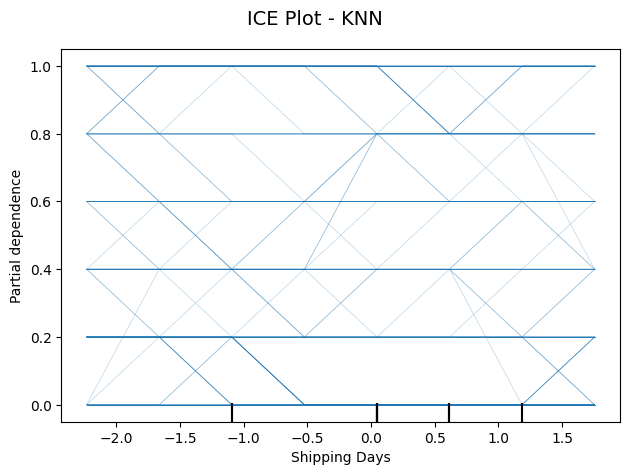

In [ ]:
feature_idx = [15]
PartialDependenceDisplay.from_estimator(
    knn_model,
    X_test,
    features=feature_idx,
    kind='individual',
    feature_names=X_train.columns
)
plt.suptitle("ICE Plot - KNN", fontsize=14)
plt.tight_layout()
plt.show()


#**3- ALE Plots For KNN**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

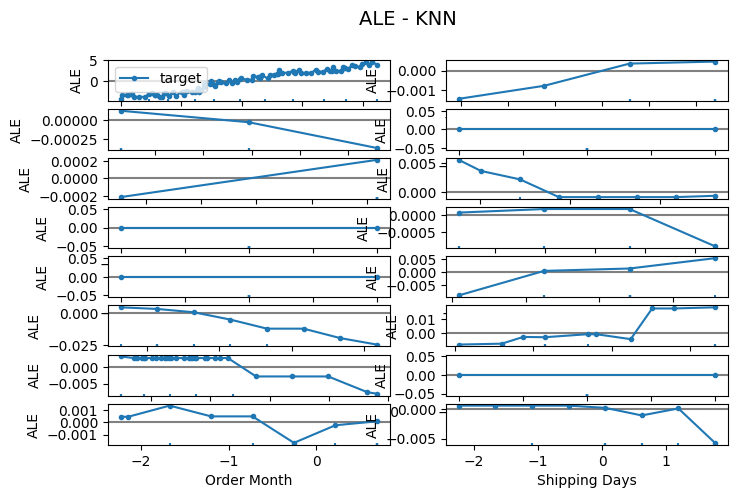

In [ ]:
proba_fun_knn = knn_model.predict_proba

ale_knn = ALE(
    proba_fun_knn,
    feature_names=X_train.columns.tolist(),
    target_names=["target"]
)

exp_knn = ale_knn.explain(X_train.values)

plot_ale(exp_knn, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)
plt.suptitle("ALE - KNN", fontsize=14)
plt.show()

#**4- Permutation Importance For KNN**

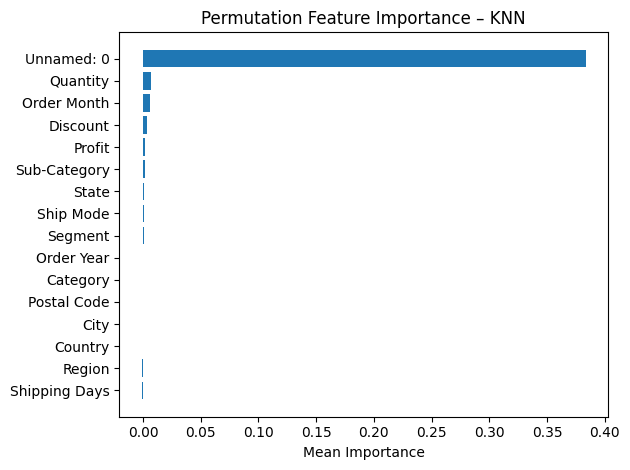

In [ ]:
result_knn = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_knn = result_knn.importances_mean.argsort()

plt.barh(X_test.columns[sorted_idx_knn], result_knn.importances_mean[sorted_idx_knn])
plt.title("Permutation Feature Importance – KNN")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

#**5- Lime For KNN**

In [ ]:
explainer_knn = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)

i = 6
exp_knn = explainer_knn.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=knn_model.predict_proba
)

exp_knn.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
